# 2.富士山から下りたい


授業前課題2では「勾配降下法」に触れました。勾配降下法は山や谷を下ることに例えられます。先週は紙を折って超えることを目指した富士山を、今週は頂上付近から下りていくことにしましょう。

断面図の確認
以下の図は富士山の断面図です。相模湾から富士山頂上付近を通り南アルプス方面へと切り取りました。縦軸は標高、横軸は300等分した番号が振られています。

### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("mtfuji_data.csv",delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


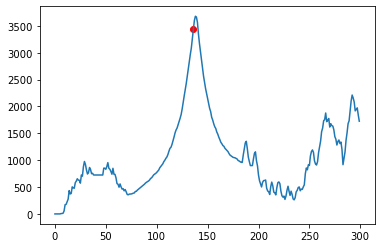

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(fuji[136,0],fuji[136,3], c='red')
plt.show()

## 【問題2】勾配の計算の関数
授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

勾配は授業前課題で行ったように、以下の計算で求まります。

Image from Gyazo

このデータでは「標高（elevation)」がyに相当します。xはそのまま「その地点の番号(x)」です。


In [3]:
import numpy as np

def koubai(xx):
    x = (fuji[1:,0] - fuji[:-1,0])
    y = (fuji[1:,3] - fuji[:-1,3])
    x_y = y / x
    return x_y[xx-1]
print(koubai(136))

168.35000000000036


###  【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

Python tutorial エラーと例外

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。


In [4]:
def kouka(AA,HOHABA=0.2):
    move_titen = AA - HOHABA * koubai(AA)
    if 0 <= move_titen < 300:
        return int(move_titen.round())
    else:
        pass
AA =136
print("{}地点の次に移動する地点：{}".format(AA, kouka(AA)))

136地点の次に移動する地点：102


### 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [5]:
def kudari(posi=136, hohaba=0.2):
    p_list = [posi]
    #h_list = [fuji[posi,3]]#hyoukou
    #for i in range(20000):
    while True:
        posi = posi - hohaba * koubai(posi)
        posi = int(posi.round())

        if 0 <= posi<300:
            if posi in p_list:  
            #if posi == p_list[-1]:
                break
            else:

                p_list.append(posi)#titenn
                #h_list.append(fuji[posi,3])#hyoukou
        else:
            break
    return p_list
kudari(201,0.05)

[201, 206]

In [6]:
x = kudari(136,0.2)

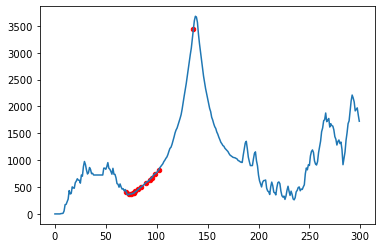

In [7]:
plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(x,fuji[x,3], 20, c='red')
plt.show()

### 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

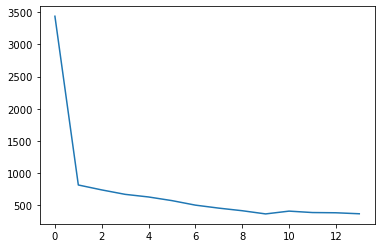

In [8]:
plt.plot(fuji[x,3])
#plt.plot(x)
plt.show()

In [9]:
def koubai2(posi=136, hohaba=0.2):
    p_list = [posi]
    h_list = [fuji[posi,3]]#hyoukou
    for i in range(20000):
        posi = koubai(posi)
        posi = int(posi.round())   
        if posi == p_list[-1] or h_list[-1] <= 0:
            break
        else:

            p_list.append(posi)#titenn
            h_list.append(fuji[posi,3])#hyoukou
    return p_list, h_list

In [10]:
plt.plot(fuji[x,3],arang[1:10])

NameError: name 'arang' is not defined

In [ ]:
x_koubai,y = koubai2()
plt.plot(x_koubai)
plt.show()

### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [ ]:
all_list = []
for i in range(1,300):
    all_list.append(kudari(i,0.2))
print(len(all_list))

In [ ]:
plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(all_list[136],fuji[all_list[136],3], 20, c='red')
plt.show()

In [ ]:
plt.plot(fuji[all_list[136],3], marker='*')
plt.show()

In [ ]:
plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(all_list[140],fuji[all_list[140],3], 20, c='red')
plt.show()

In [ ]:
for i in range(136,150):
    plt.plot(fuji[all_list[i],3],marker='*')
    plt.show()

### 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [ ]:
al = np.arange(0.01,0.5,0.07)
al_list = []
for i in range(len(al)):
    al_list.append(kudari(136,al[i]))
print(len(al_list))

In [ ]:
for i in range(7):
    plt.plot(fuji[:,0],fuji[:,3])
    plt.scatter(al_list[i],fuji[al_list[i],3], 20, c='red')
    plt.show()

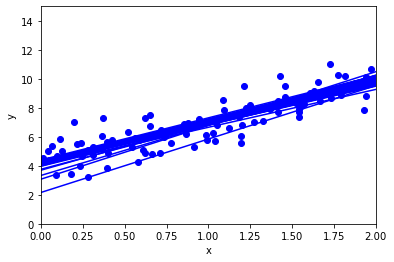

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100
n_epochs = 50 # エポック数
batch_size = 20 # バッチサイズ

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0/float(t+t1)

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance

theta = np.random.randn(2, 1)

plt.plot(X, y, "ob")

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        t += 1
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2.0/batch_size*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients

        if(i<20):
            X_new = np.array([[0], [2]])
            X_new_b = np.c_[np.ones((2, 1)), X_new]
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "b-")

plt.xlabel("x")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.savefig("minibatch_gradient_descent")
plt.show()